In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2 ,l1
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

from sklearn.model_selection import train_test_split

import numpy as np
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')

plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

In [2]:
history = '''
Epoch 1/30
104/104 [==============================] - 294s 2s/step - loss: 3.2837 - accuracy: 0.1509 - val_loss: 2.1707 - val_accuracy: 0.1889
Epoch 2/30
104/104 [==============================] - 240s 2s/step - loss: 2.0991 - accuracy: 0.2370 - val_loss: 2.0887 - val_accuracy: 0.2415
Epoch 3/30
104/104 [==============================] - 239s 2s/step - loss: 2.0158 - accuracy: 0.2867 - val_loss: 1.8465 - val_accuracy: 0.3500
Epoch 4/30
104/104 [==============================] - 239s 2s/step - loss: 1.7630 - accuracy: 0.3741 - val_loss: 1.7999 - val_accuracy: 0.3639
Epoch 5/30
104/104 [==============================] - 243s 2s/step - loss: 1.6558 - accuracy: 0.4073 - val_loss: 1.6232 - val_accuracy: 0.4412
Epoch 6/30
104/104 [==============================] - 238s 2s/step - loss: 1.5697 - accuracy: 0.4359 - val_loss: 1.5400 - val_accuracy: 0.4517
Epoch 7/30
104/104 [==============================] - 254s 2s/step - loss: 1.5229 - accuracy: 0.4485 - val_loss: 1.5769 - val_accuracy: 0.4449
Epoch 8/30
104/104 [==============================] - 239s 2s/step - loss: 1.5158 - accuracy: 0.4532 - val_loss: 1.5358 - val_accuracy: 0.4668
Epoch 9/30
104/104 [==============================] - 255s 2s/step - loss: 1.4635 - accuracy: 0.4766 - val_loss: 1.5257 - val_accuracy: 0.4412
Epoch 10/30
104/104 [==============================] - 253s 2s/step - loss: 1.4138 - accuracy: 0.4936 - val_loss: 1.4254 - val_accuracy: 0.4776
Epoch 11/30
104/104 [==============================] - 239s 2s/step - loss: 1.3737 - accuracy: 0.5059 - val_loss: 1.4275 - val_accuracy: 0.4903
Epoch 12/30
104/104 [==============================] - 237s 2s/step - loss: 1.2854 - accuracy: 0.5406 - val_loss: 1.2950 - val_accuracy: 0.5418
Epoch 13/30
104/104 [==============================] - 240s 2s/step - loss: 1.2663 - accuracy: 0.5463 - val_loss: 1.2436 - val_accuracy: 0.5491
Epoch 14/30
104/104 [==============================] - 241s 2s/step - loss: 1.2301 - accuracy: 0.5609 - val_loss: 1.1843 - val_accuracy: 0.5676
Epoch 15/30
104/104 [==============================] - 258s 2s/step - loss: 1.1907 - accuracy: 0.5755 - val_loss: 1.2777 - val_accuracy: 0.5449
Epoch 16/30
104/104 [==============================] - 238s 2s/step - loss: 1.1787 - accuracy: 0.5785 - val_loss: 1.1683 - val_accuracy: 0.5707
Epoch 17/30
104/104 [==============================] - 237s 2s/step - loss: 1.1518 - accuracy: 0.5856 - val_loss: 1.1280 - val_accuracy: 0.5977
Epoch 18/30
104/104 [==============================] - 236s 2s/step - loss: 1.0894 - accuracy: 0.6111 - val_loss: 1.1129 - val_accuracy: 0.6116
Epoch 19/30
104/104 [==============================] - 235s 2s/step - loss: 1.0939 - accuracy: 0.6094 - val_loss: 1.1973 - val_accuracy: 0.5747
Epoch 20/30
104/104 [==============================] - 235s 2s/step - loss: 1.0697 - accuracy: 0.6158 - val_loss: 1.0528 - val_accuracy: 0.6256
Epoch 21/30
104/104 [==============================] - 236s 2s/step - loss: 1.0515 - accuracy: 0.6236 - val_loss: 1.0524 - val_accuracy: 0.6298
Epoch 22/30
104/104 [==============================] - 236s 2s/step - loss: 1.0062 - accuracy: 0.6379 - val_loss: 1.0283 - val_accuracy: 0.6395
Epoch 23/30
104/104 [==============================] - 255s 2s/step - loss: 1.0115 - accuracy: 0.6410 - val_loss: 1.0433 - val_accuracy: 0.6366
Epoch 24/30
104/104 [==============================] - 237s 2s/step - loss: 0.9930 - accuracy: 0.6530 - val_loss: 0.9753 - val_accuracy: 0.6472
Epoch 25/30
104/104 [==============================] - 242s 2s/step - loss: 0.9709 - accuracy: 0.6541 - val_loss: 1.0045 - val_accuracy: 0.6449
Epoch 26/30
104/104 [==============================] - 333s 3s/step - loss: 0.9659 - accuracy: 0.6575 - val_loss: 1.0014 - val_accuracy: 0.6554
Epoch 27/30
104/104 [==============================] - 261s 3s/step - loss: 0.9699 - accuracy: 0.6585 - val_loss: 0.9845 - val_accuracy: 0.6628
'''

import re

# Regular expression pattern to extract all numbers after "loss:"
loss_pattern = r' loss: ([0-9.]+)'

# Regular expression pattern to extract all numbers after "val_loss:"
val_loss_pattern = r'val_loss: ([0-9.]+)'
accuracy_pattern = r' accuracy: ([0-9.]+)'
val_accuracy_pattern = r'val_accuracy: ([0-9.]+)'

# Find all occurrences of the numbers
loss_values = re.findall(loss_pattern, history)
loss_values = [float(i) for i in loss_values]

val_loss_values = re.findall(val_loss_pattern, history)
val_loss_values = [float(i) for i in val_loss_values]

accuracy_values = re.findall(accuracy_pattern, history)
accuracy_values = [round(100*float(i), 2) for i in accuracy_values]

val_accuracy_values = re.findall(val_accuracy_pattern, history)
val_accuracy_values = [round(100*float(i), 2) for i in val_accuracy_values]

print(f"All Loss values: {loss_values}")
print(f"All Validation Loss values: {val_loss_values}")

print(f"All accuracy_values: {accuracy_values}")
print(f"All val_accuracy_values: {val_accuracy_values}")

print(len(loss_values) == len(val_loss_values) == len(accuracy_values) == len(val_accuracy_values))


All Loss values: [3.2837, 2.0991, 2.0158, 1.763, 1.6558, 1.5697, 1.5229, 1.5158, 1.4635, 1.4138, 1.3737, 1.2854, 1.2663, 1.2301, 1.1907, 1.1787, 1.1518, 1.0894, 1.0939, 1.0697, 1.0515, 1.0062, 1.0115, 0.993, 0.9709, 0.9659, 0.9699]
All Validation Loss values: [2.1707, 2.0887, 1.8465, 1.7999, 1.6232, 1.54, 1.5769, 1.5358, 1.5257, 1.4254, 1.4275, 1.295, 1.2436, 1.1843, 1.2777, 1.1683, 1.128, 1.1129, 1.1973, 1.0528, 1.0524, 1.0283, 1.0433, 0.9753, 1.0045, 1.0014, 0.9845]
All accuracy_values: [15.09, 23.7, 28.67, 37.41, 40.73, 43.59, 44.85, 45.32, 47.66, 49.36, 50.59, 54.06, 54.63, 56.09, 57.55, 57.85, 58.56, 61.11, 60.94, 61.58, 62.36, 63.79, 64.1, 65.3, 65.41, 65.75, 65.85]
All val_accuracy_values: [18.89, 24.15, 35.0, 36.39, 44.12, 45.17, 44.49, 46.68, 44.12, 47.76, 49.03, 54.18, 54.91, 56.76, 54.49, 57.07, 59.77, 61.16, 57.47, 62.56, 62.98, 63.95, 63.66, 64.72, 64.49, 65.54, 66.28]
True


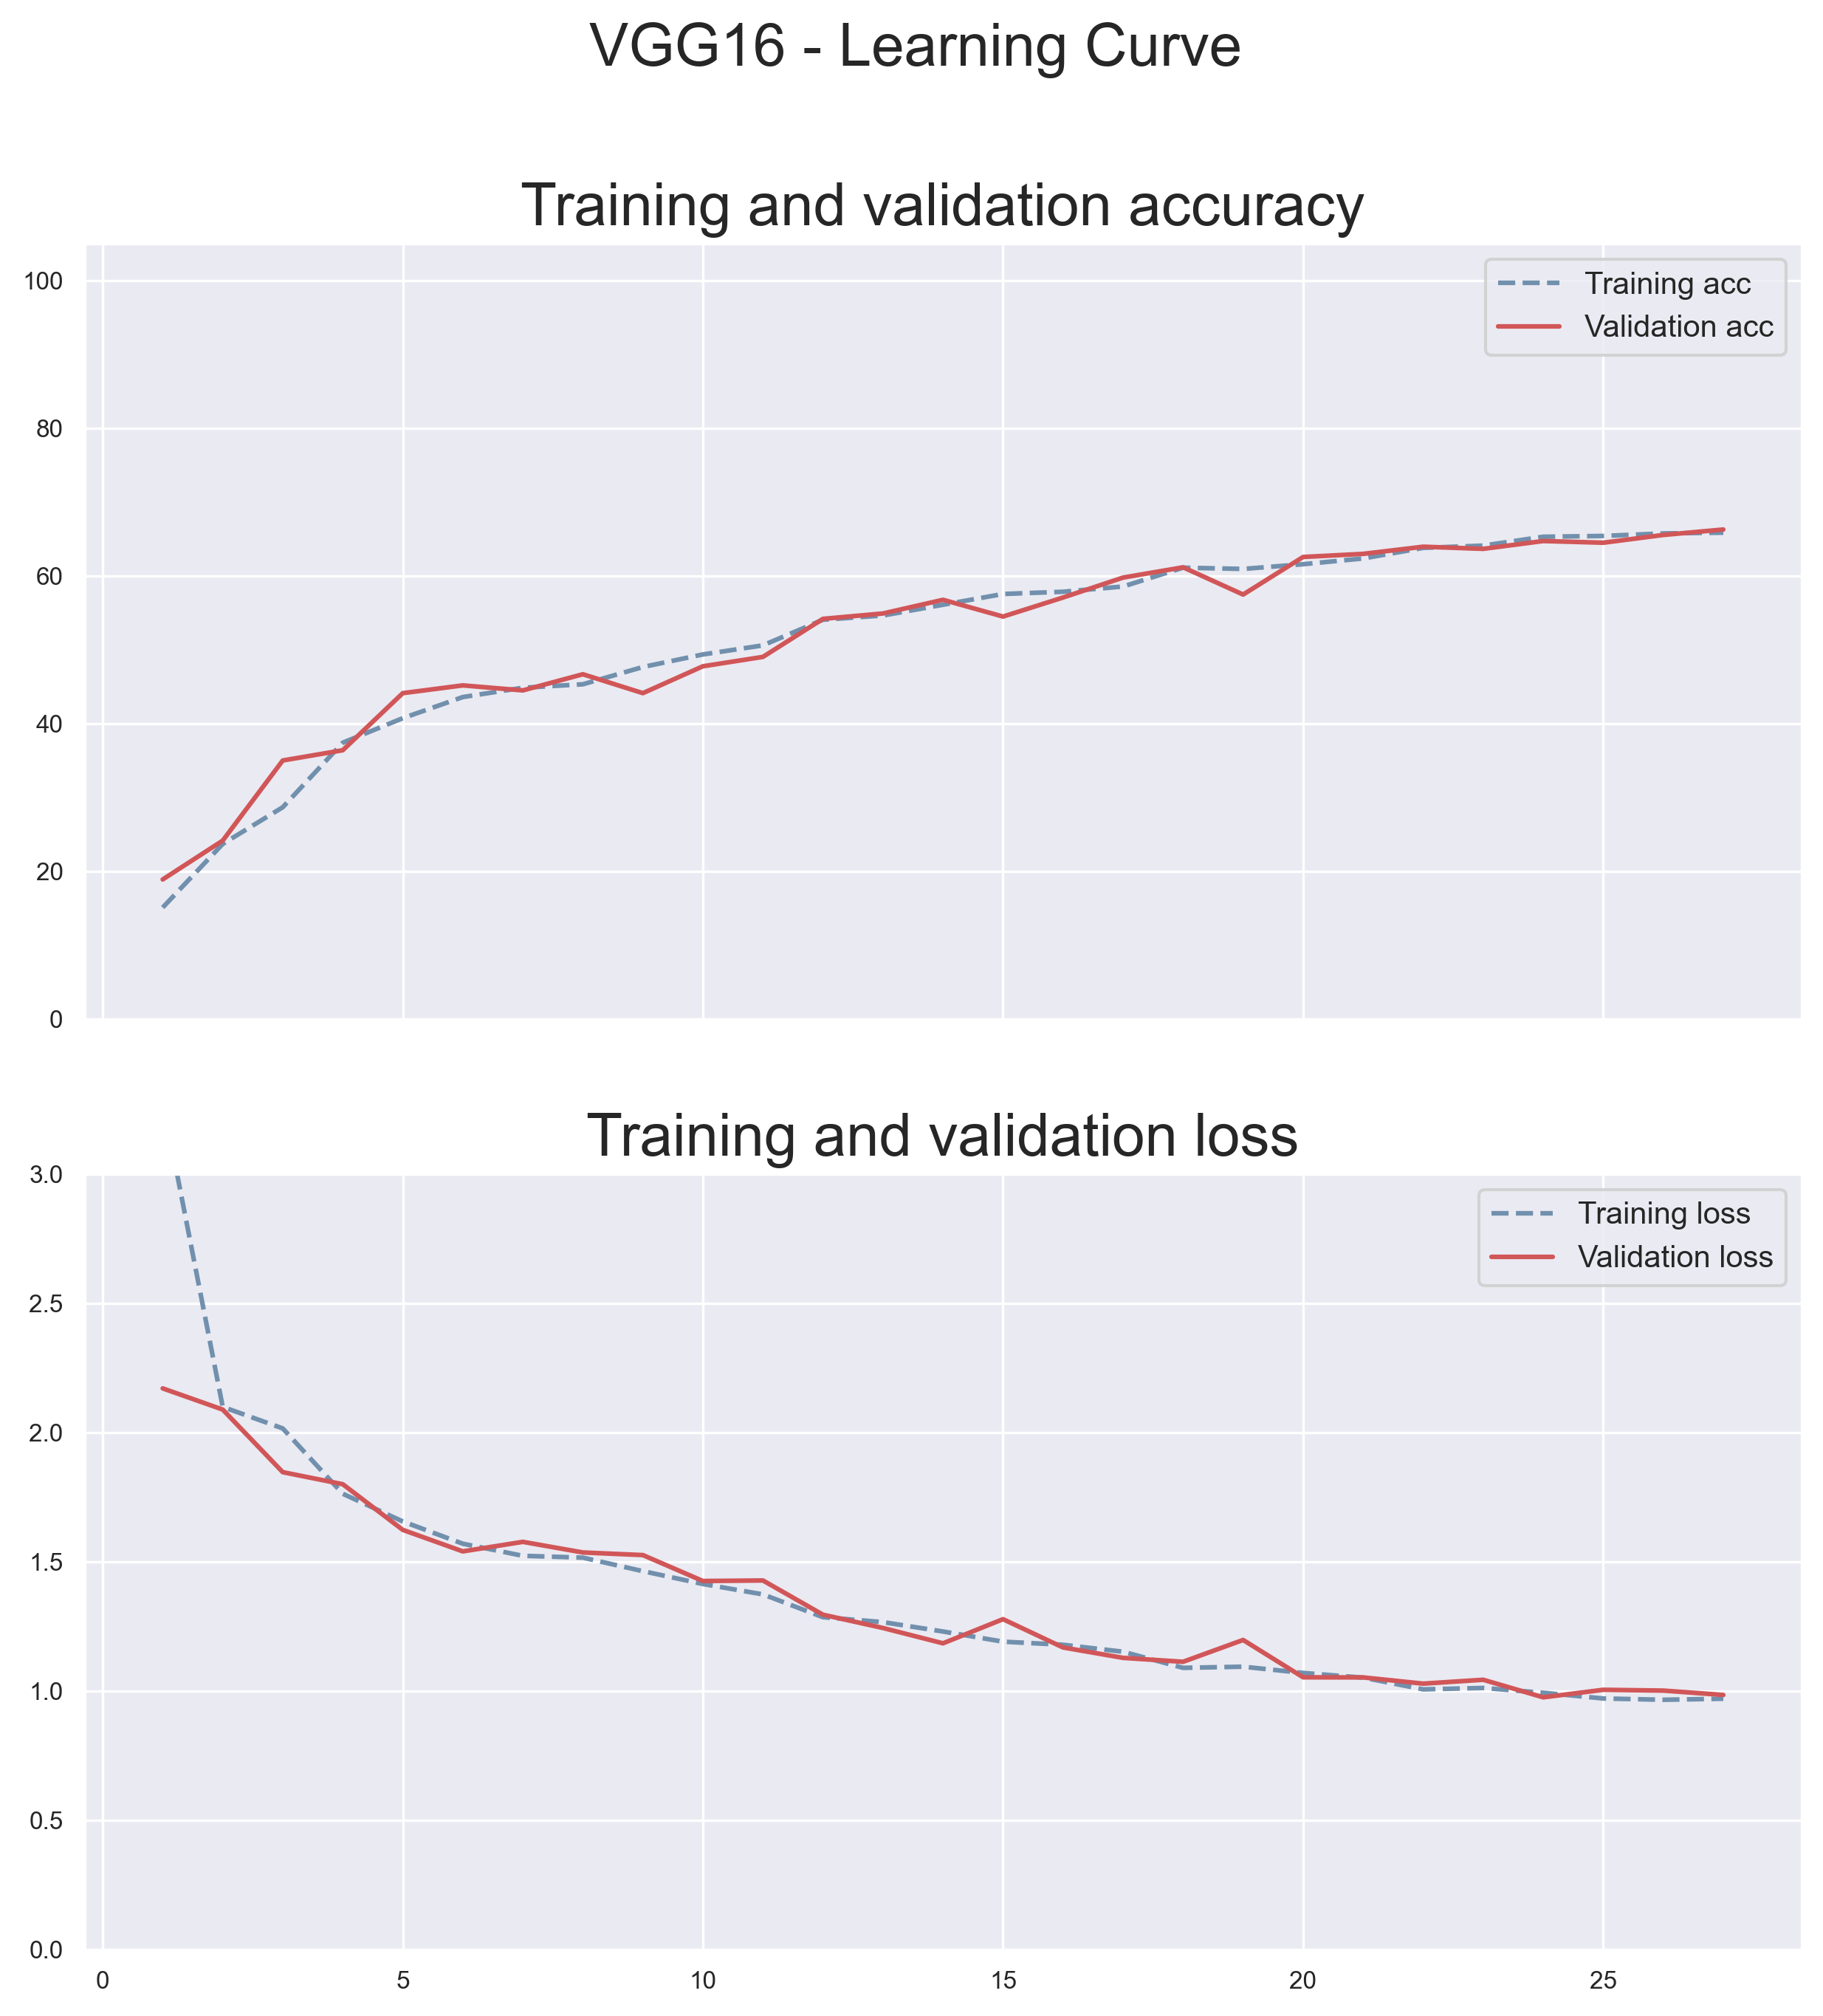

In [3]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10), dpi = 300, sharex = True)

epochs = range(1, len(loss_values) + 1)
ax[0].plot(epochs, accuracy_values, color = '#7190ad', linestyle = '--', label='Training acc')
ax[0].plot(epochs, val_accuracy_values, color = '#d15658', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
# ax[0].axhline(y=65.85, color='white',  xmin = 0, xmax = 0.92,
#               linestyle='--',
#               alpha = 0.8, label='Max Accuracy',)
# ax[0].axvline(x= 27, color='white',  ymin = 0, ymax = 0.645,
#               linestyle='--',
#               alpha = 0.8,)
ax[0].set_ylim([0, 105])
ax[0].legend()

ax[1].plot(epochs, loss_values,color = '#7190ad', linestyle = '--', label='Training loss')
ax[1].plot(epochs, val_loss_values, color = '#d15658', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_ylim([0, 3])
ax[1].legend()

plt.suptitle('VGG16 - Learning Curve')
plt.savefig('VGG16 - Learning Curve.png', format='png', dpi=300)
plt.show()

In [4]:
history = '''
131/131 [==============================] - 46s 348ms/step - loss: 1.1892 - accuracy: 0.6863 - val_loss: 1.2141 - val_accuracy: 0.6773
Epoch 9/30
131/131 [==============================] - 45s 341ms/step - loss: 1.1336 - accuracy: 0.7000 - val_loss: 1.1598 - val_accuracy: 0.6954
Epoch 10/30
131/131 [==============================] - 45s 346ms/step - loss: 1.0837 - accuracy: 0.7129 - val_loss: 1.1194 - val_accuracy: 0.7010
Epoch 11/30
131/131 [==============================] - 45s 348ms/step - loss: 1.0418 - accuracy: 0.7230 - val_loss: 1.0817 - val_accuracy: 0.7099
Epoch 12/30
131/131 [==============================] - 45s 343ms/step - loss: 1.0041 - accuracy: 0.7332 - val_loss: 1.0473 - val_accuracy: 0.7214

131/131 [==============================] - 45s 343ms/step - loss: 0.9716 - accuracy: 0.7415 - val_loss: 1.0172 - val_accuracy: 0.7359
Epoch 14/30
131/131 [==============================] - 45s 343ms/step - loss: 0.9424 - accuracy: 0.7493 - val_loss: 0.9912 - val_accuracy: 0.7395
Epoch 15/30
131/131 [==============================] - 52s 394ms/step - loss: 0.9148 - accuracy: 0.7581 - val_loss: 0.9685 - val_accuracy: 0.7351
Epoch 16/30
131/131 [==============================] - 45s 339ms/step - loss: 0.8900 - accuracy: 0.7636 - val_loss: 0.9472 - val_accuracy: 0.7443
Epoch 17/30
131/131 [==============================] - 52s 396ms/step - loss: 0.8673 - accuracy: 0.7701 - val_loss: 0.9274 - val_accuracy: 0.7490
Epoch 18/30
131/131 [==============================] - 45s 345ms/step - loss: 0.8465 - accuracy: 0.7778 - val_loss: 0.9107 - val_accuracy: 0.7496
Epoch 19/30
131/131 [==============================] - 53s 401ms/step - loss: 0.8268 - accuracy: 0.7822 - val_loss: 0.8936 - val_accuracy: 0.7571
Epoch 20/30
131/131 [==============================] - 45s 342ms/step - loss: 0.8085 - accuracy: 0.7866 - val_loss: 0.8763 - val_accuracy: 0.7630
Epoch 21/30
131/131 [==============================] - 47s 358ms/step - loss: 0.7916 - accuracy: 0.7884 - val_loss: 0.8675 - val_accuracy: 0.7518
Epoch 22/30
131/131 [==============================] - 45s 347ms/step - loss: 0.7763 - accuracy: 0.7963 - val_loss: 0.8482 - val_accuracy: 0.7677
Epoch 23/30
131/131 [==============================] - 46s 348ms/step - loss: 0.7607 - accuracy: 0.7982 - val_loss: 0.8367 - val_accuracy: 0.7677
Epoch 24/30
131/131 [==============================] - 45s 341ms/step - loss: 0.7474 - accuracy: 0.7991 - val_loss: 0.8258 - val_accuracy: 0.7719
Epoch 25/30
131/131 [==============================] - 45s 346ms/step - loss: 0.7331 - accuracy: 0.8056 - val_loss: 0.8129 - val_accuracy: 0.7753
Epoch 26/30
131/131 [==============================] - 45s 344ms/step - loss: 0.7206 - accuracy: 0.8095 - val_loss: 0.8033 - val_accuracy: 0.7736
Epoch 27/30
131/131 [==============================] - 44s 339ms/step - loss: 0.7091 - accuracy: 0.8072 - val_loss: 0.7938 - val_accuracy: 0.7764
Epoch 28/30
131/131 [==============================] - 45s 344ms/step - loss: 0.6971 - accuracy: 0.8118 - val_loss: 0.7889 - val_accuracy: 0.7725
Epoch 29/30
131/131 [==============================] - 51s 394ms/step - loss: 0.6867 - accuracy: 0.8132 - val_loss: 0.7744 - val_accuracy: 0.7800
Epoch 30/30
131/131 [==============================] - 45s 341ms/step - loss: 0.6759 - accuracy: 0.8176 - val_loss: 0.7662 - val_accuracy: 0.7789
Epoch 1/20
131/131 [==============================] - 53s 402ms/step - loss: 0.5829 - accuracy: 0.8419 - val_loss: 0.6921 - val_accuracy: 0.7968 - lr: 2.0000e-05
Epoch 2/20
131/131 [==============================] - 52s 400ms/step - loss: 0.5766 - accuracy: 0.8423 - val_loss: 0.6879 - val_accuracy: 0.7998 - lr: 2.0000e-05
Epoch 3/20
131/131 [==============================] - 45s 344ms/step - loss: 0.5704 - accuracy: 0.8433 - val_loss: 0.6840 - val_accuracy: 0.7976 - lr: 2.0000e-05
Epoch 4/20
131/131 [==============================] - 45s 346ms/step - loss: 0.5635 - accuracy: 0.8472 - val_loss: 0.6791 - val_accuracy: 0.8007 - lr: 2.0000e-05
Epoch 5/20
131/131 [==============================] - 45s 340ms/step - loss: 0.5574 - accuracy: 0.8493 - val_loss: 0.6746 - val_accuracy: 0.8023 - lr: 2.0000e-05
Epoch 6/20
131/131 [==============================] - 45s 344ms/step - loss: 0.5512 - accuracy: 0.8521 - val_loss: 0.6721 - val_accuracy: 0.8012 - lr: 2.0000e-05
Epoch 7/20
131/131 [==============================] - 44s 338ms/step - loss: 0.5450 - accuracy: 0.8523 - val_loss: 0.6662 - val_accuracy: 0.8046 - lr: 2.0000e-05
Epoch 8/20
131/131 [==============================] - 45s 342ms/step - loss: 0.5396 - accuracy: 0.8538 - val_loss: 0.6613 - val_accuracy: 0.8065 - lr: 2.0000e-05
Epoch 9/20
131/131 [==============================] - 44s 337ms/step - loss: 0.5340 - accuracy: 0.8542 - val_loss: 0.6564 - val_accuracy: 0.8076 - lr: 2.0000e-05
Epoch 10/20
131/131 [==============================] - 45s 341ms/step - loss: 0.5278 - accuracy: 0.8557 - val_loss: 0.6521 - val_accuracy: 0.8088 - lr: 2.0000e-05
Epoch 11/20
131/131 [==============================] - 52s 395ms/step - loss: 0.5232 - accuracy: 0.8579 - val_loss: 0.6483 - val_accuracy: 0.8113 - lr: 2.0000e-05
Epoch 12/20
131/131 [==============================] - 44s 340ms/step - loss: 0.5171 - accuracy: 0.8603 - val_loss: 0.6467 - val_accuracy: 0.8057 - lr: 2.0000e-05
Epoch 13/20
131/131 [==============================] - 45s 347ms/step - loss: 0.5124 - accuracy: 0.8589 - val_loss: 0.6404 - val_accuracy: 0.8054 - lr: 2.0000e-05
Epoch 14/20
131/131 [==============================] - 46s 347ms/step - loss: 0.5077 - accuracy: 0.8632 - val_loss: 0.6361 - val_accuracy: 0.8085 - lr: 2.0000e-05
Epoch 15/20
131/131 [==============================] - 45s 342ms/step - loss: 0.5023 - accuracy: 0.8633 - val_loss: 0.6339 - val_accuracy: 0.8099 - lr: 2.0000e-05
Epoch 16/20
131/131 [==============================] - 46s 348ms/step - loss: 0.4976 - accuracy: 0.8656 - val_loss: 0.6340 - val_accuracy: 0.8063 - lr: 2.0000e-05
Epoch 17/20
131/131 [==============================] - 52s 401ms/step - loss: 0.4930 - accuracy: 0.8688 - val_loss: 0.6272 - val_accuracy: 0.8116 - lr: 2.0000e-05
Epoch 18/20
131/131 [==============================] - 45s 344ms/step - loss: 0.4887 - accuracy: 0.8704 - val_loss: 0.6255 - val_accuracy: 0.8090 - lr: 2.0000e-05
Epoch 19/20
131/131 [==============================] - 45s 340ms/step - loss: 0.4835 - accuracy: 0.8698 - val_loss: 0.6196 - val_accuracy: 0.8149 - lr: 2.0000e-05
Epoch 20/20
131/131 [==============================] - 44s 339ms/step - loss: 0.4791 - accuracy: 0.8742 - val_loss: 0.6225 - val_accuracy: 0.8110 - lr: 2.0000e-05
'''

import re

# Regular expression pattern to extract all numbers after "loss:"
loss_pattern = r' loss: ([0-9.]+)'

# Regular expression pattern to extract all numbers after "val_loss:"
val_loss_pattern = r'val_loss: ([0-9.]+)'
accuracy_pattern = r' accuracy: ([0-9.]+)'
val_accuracy_pattern = r'val_accuracy: ([0-9.]+)'

# Find all occurrences of the numbers
loss_values = re.findall(loss_pattern, history)
loss_values = [float(i) for i in loss_values]

val_loss_values = re.findall(val_loss_pattern, history)
val_loss_values = [float(i) for i in val_loss_values]

accuracy_values = re.findall(accuracy_pattern, history)
accuracy_values = [round(100*float(i), 2) for i in accuracy_values]

val_accuracy_values = re.findall(val_accuracy_pattern, history)
val_accuracy_values = [round(100*float(i), 2) for i in val_accuracy_values]

print(f"All Loss values: {loss_values}")
print(f"All Validation Loss values: {val_loss_values}")

print(f"All accuracy_values: {accuracy_values}")
print(f"All val_accuracy_values: {val_accuracy_values}")

print(len(loss_values) == len(val_loss_values) == len(accuracy_values) == len(val_accuracy_values))


All Loss values: [1.1892, 1.1336, 1.0837, 1.0418, 1.0041, 0.9716, 0.9424, 0.9148, 0.89, 0.8673, 0.8465, 0.8268, 0.8085, 0.7916, 0.7763, 0.7607, 0.7474, 0.7331, 0.7206, 0.7091, 0.6971, 0.6867, 0.6759, 0.5829, 0.5766, 0.5704, 0.5635, 0.5574, 0.5512, 0.545, 0.5396, 0.534, 0.5278, 0.5232, 0.5171, 0.5124, 0.5077, 0.5023, 0.4976, 0.493, 0.4887, 0.4835, 0.4791]
All Validation Loss values: [1.2141, 1.1598, 1.1194, 1.0817, 1.0473, 1.0172, 0.9912, 0.9685, 0.9472, 0.9274, 0.9107, 0.8936, 0.8763, 0.8675, 0.8482, 0.8367, 0.8258, 0.8129, 0.8033, 0.7938, 0.7889, 0.7744, 0.7662, 0.6921, 0.6879, 0.684, 0.6791, 0.6746, 0.6721, 0.6662, 0.6613, 0.6564, 0.6521, 0.6483, 0.6467, 0.6404, 0.6361, 0.6339, 0.634, 0.6272, 0.6255, 0.6196, 0.6225]
All accuracy_values: [68.63, 70.0, 71.29, 72.3, 73.32, 74.15, 74.93, 75.81, 76.36, 77.01, 77.78, 78.22, 78.66, 78.84, 79.63, 79.82, 79.91, 80.56, 80.95, 80.72, 81.18, 81.32, 81.76, 84.19, 84.23, 84.33, 84.72, 84.93, 85.21, 85.23, 85.38, 85.42, 85.57, 85.79, 86.03, 85.89, 

In [5]:
np.max(loss_values)

1.1892

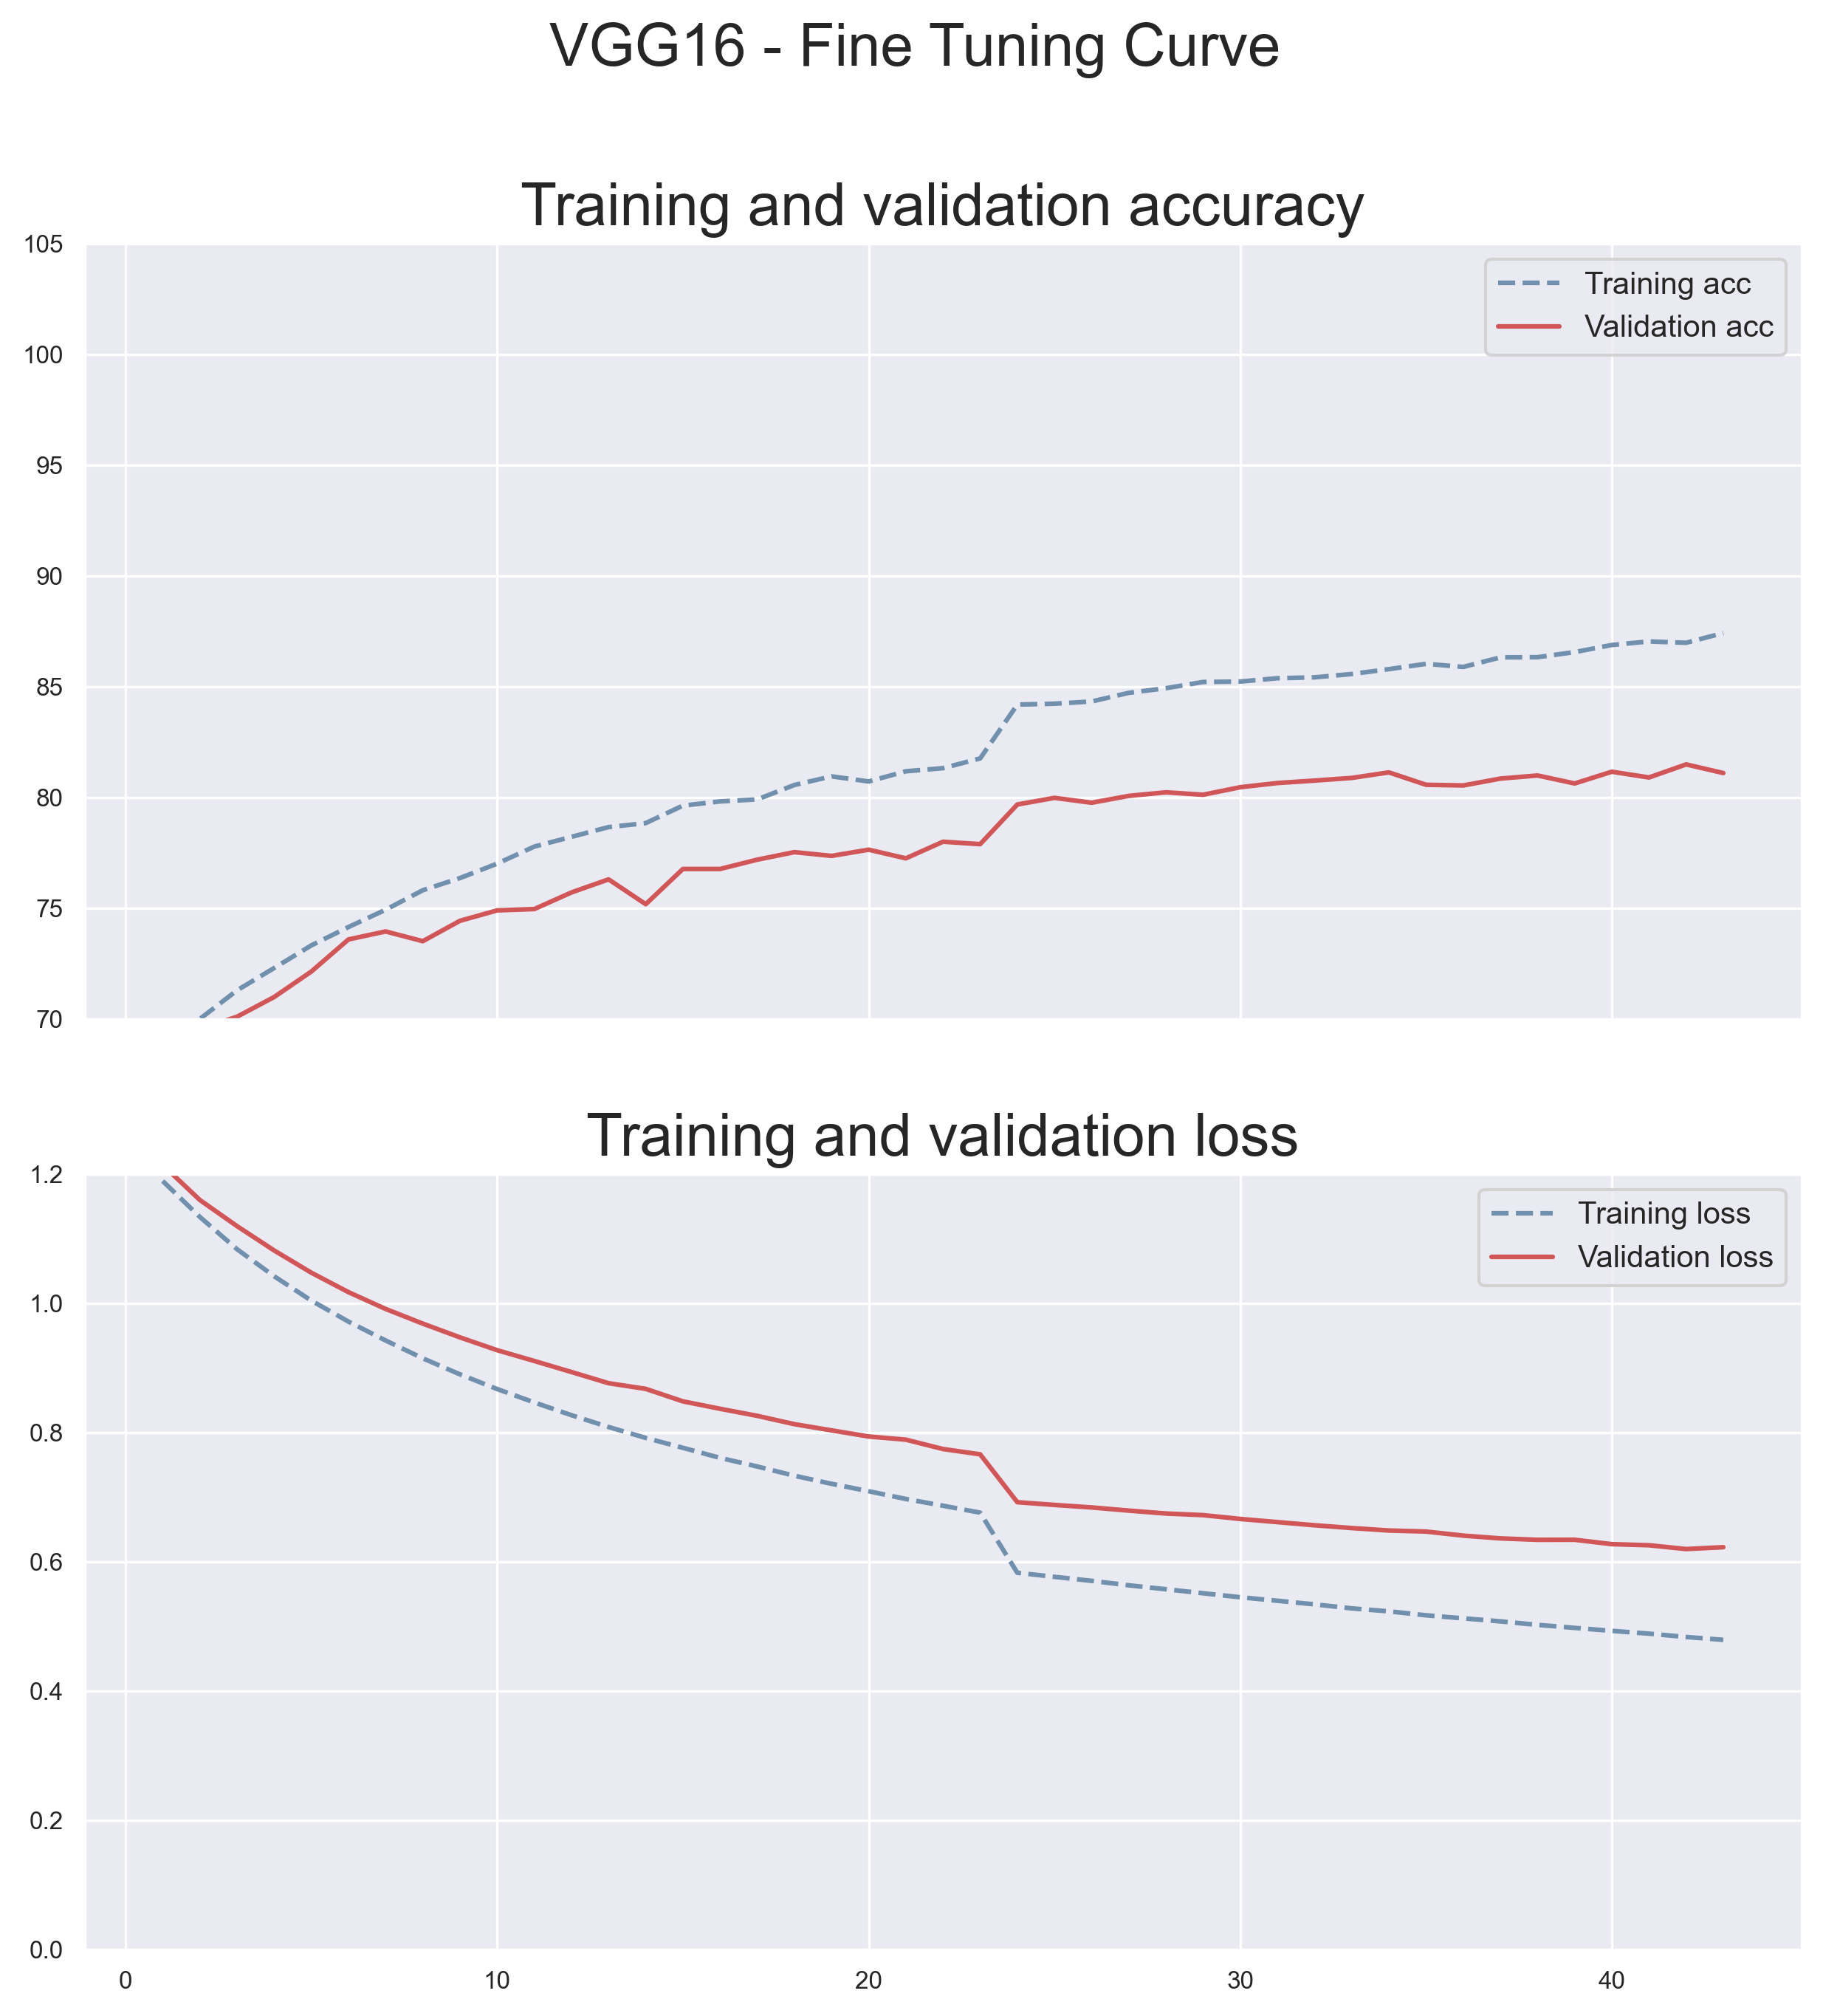

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10), dpi = 300, sharex = True)

epochs = range(1, len(loss_values) + 1)
ax[0].plot(epochs, accuracy_values, color = '#7190ad', linestyle = '--', label='Training acc')
ax[0].plot(epochs, val_accuracy_values, color = '#d15658', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
# ax[0].axhline(y=65.85, color='white',  xmin = 0, xmax = 0.92,
#               linestyle='--',
#               alpha = 0.8, label='Max Accuracy',)
# ax[0].axvline(x= 27, color='white',  ymin = 0, ymax = 0.645,
#               linestyle='--',
#               alpha = 0.8,)
ax[0].set_ylim([70, 105])
ax[0].legend()

ax[1].plot(epochs, loss_values,color = '#7190ad', linestyle = '--', label='Training loss')
ax[1].plot(epochs, val_loss_values, color = '#d15658', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_ylim([0, 1.2])
ax[1].legend()

plt.suptitle('VGG16 - Fine Tuning Curve')
plt.savefig('VGG16 - Fine Tuning Curve.png', format='png', dpi=300)
plt.show()

In [7]:
history = '''
Epoch 1/15
104/104 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.7586 
Epoch 1: val_accuracy improved from -inf to 0.30284, saving model to model2_checkpoint.h5
104/104 [==============================] - 2613s 24s/step - loss: 0.7233 - accuracy: 0.7586 - val_loss: 21.2017 - val_accuracy: 0.3028
Epoch 2/15
104/104 [==============================] - ETA: 0s - loss: 0.3337 - accuracy: 0.8842
Epoch 2: val_accuracy improved from 0.30284 to 0.78153, saving model to model2_checkpoint.h5
104/104 [==============================] - 269s 3s/step - loss: 0.3337 - accuracy: 0.8842 - val_loss: 0.6517 - val_accuracy: 0.7815
Epoch 3/15
104/104 [==============================] - ETA: 0s - loss: 0.2617 - accuracy: 0.9113
Epoch 3: val_accuracy improved from 0.78153 to 0.80313, saving model to model2_checkpoint.h5
104/104 [==============================] - 257s 2s/step - loss: 0.2617 - accuracy: 0.9113 - val_loss: 0.6626 - val_accuracy: 0.8031
Epoch 4/15
104/104 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9225
Epoch 4: val_accuracy improved from 0.80313 to 0.81080, saving model to model2_checkpoint.h5
104/104 [==============================] - 272s 3s/step - loss: 0.2292 - accuracy: 0.9225 - val_loss: 0.6378 - val_accuracy: 0.8108
Epoch 5/15
104/104 [==============================] - ETA: 0s - loss: 0.1838 - accuracy: 0.9375
Epoch 5: val_accuracy improved from 0.81080 to 0.90625, saving model to model2_checkpoint.h5
104/104 [==============================] - 271s 3s/step - loss: 0.1838 - accuracy: 0.9375 - val_loss: 0.2913 - val_accuracy: 0.9062
Epoch 6/15
104/104 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9413
Epoch 6: val_accuracy did not improve from 0.90625
104/104 [==============================] - 269s 3s/step - loss: 0.1761 - accuracy: 0.9413 - val_loss: 0.3704 - val_accuracy: 0.8739
Epoch 7/15
104/104 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.9465
Epoch 7: val_accuracy did not improve from 0.90625
104/104 [==============================] - 268s 3s/step - loss: 0.1574 - accuracy: 0.9465 - val_loss: 2.8813 - val_accuracy: 0.5108
Epoch 8/15
104/104 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9450
Epoch 8: val_accuracy did not improve from 0.90625
104/104 [==============================] - 249s 2s/step - loss: 0.1630 - accuracy: 0.9450 - val_loss: 1.5308 - val_accuracy: 0.7599
Epoch 9/15
104/104 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9520
Epoch 9: val_accuracy did not improve from 0.90625
104/104 [==============================] - 268s 3s/step - loss: 0.1532 - accuracy: 0.9520 - val_loss: 0.5165 - val_accuracy: 0.8474
Epoch 10/15
104/104 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9568
Epoch 10: val_accuracy improved from 0.90625 to 0.91080, saving model to model2_checkpoint.h5
104/104 [==============================] - 273s 3s/step - loss: 0.1287 - accuracy: 0.9568 - val_loss: 0.2739 - val_accuracy: 0.9108
Epoch 11/15
104/104 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9645
Epoch 11: val_accuracy did not improve from 0.91080
104/104 [==============================] - 251s 2s/step - loss: 0.1029 - accuracy: 0.9645 - val_loss: 0.5888 - val_accuracy: 0.8435
Epoch 12/15
104/104 [==============================] - ETA: 0s - loss: 0.1028 - accuracy: 0.9644
Epoch 12: val_accuracy did not improve from 0.91080
104/104 [==============================] - 270s 3s/step - loss: 0.1028 - accuracy: 0.9644 - val_loss: 0.2832 - val_accuracy: 0.9023
Epoch 13/15
104/104 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9574
Epoch 13: val_accuracy did not improve from 0.91080
104/104 [==============================] - 271s 3s/step - loss: 0.1177 - accuracy: 0.9574 - val_loss: 0.3002 - val_accuracy: 0.9011
Epoch 14/15
104/104 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9604
Epoch 14: val_accuracy improved from 0.91080 to 0.93324, saving model to model2_checkpoint.h5
104/104 [==============================] - 269s 3s/step - loss: 0.1200 - accuracy: 0.9604 - val_loss: 0.2056 - val_accuracy: 0.9332
Epoch 15/15
104/104 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9600
Epoch 15: val_accuracy did not improve from 0.93324
104/104 [==============================] - 269s 3s/step - loss: 0.1135 - accuracy: 0.9600 - val_loss: 0.1955 - val_accuracy: 0.9330


Epoch 1/10
104/104 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9685
Epoch 1: val_loss improved from inf to 0.26744, saving model to model2_checkpoint.h5
104/104 [==============================] - 255s 2s/step - loss: 0.0930 - accuracy: 0.9685 - val_loss: 0.2674 - val_accuracy: 0.9207
Epoch 2/10
104/104 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9708
Epoch 2: val_loss did not improve from 0.26744
104/104 [==============================] - 255s 2s/step - loss: 0.0884 - accuracy: 0.9708 - val_loss: 0.3423 - val_accuracy: 0.8966
Epoch 3/10
104/104 [==============================] - ETA: 0s - loss: 0.0857 - accuracy: 0.9701
Epoch 3: val_loss did not improve from 0.26744
104/104 [==============================] - 255s 2s/step - loss: 0.0857 - accuracy: 0.9701 - val_loss: 0.4417 - val_accuracy: 0.8827
Epoch 4/10
104/104 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9614
Epoch 4: val_loss did not improve from 0.26744
104/104 [==============================] - 269s 3s/step - loss: 0.1160 - accuracy: 0.9614 - val_loss: 0.3483 - val_accuracy: 0.8912
Epoch 5/10
104/104 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9697
Epoch 5: val_loss improved from 0.26744 to 0.20777, saving model to model2_checkpoint.h5
104/104 [==============================] - 249s 2s/step - loss: 0.0864 - accuracy: 0.9697 - val_loss: 0.2078 - val_accuracy: 0.9341
Epoch 6/10
104/104 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.9735
Epoch 6: val_loss did not improve from 0.20777
104/104 [==============================] - 249s 2s/step - loss: 0.0809 - accuracy: 0.9735 - val_loss: 0.2418 - val_accuracy: 0.9315
Epoch 7/10
104/104 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9794
Epoch 7: val_loss improved from 0.20777 to 0.15689, saving model to model2_checkpoint.h5
104/104 [==============================] - 268s 3s/step - loss: 0.0651 - accuracy: 0.9794 - val_loss: 0.1569 - val_accuracy: 0.9531
Epoch 8/10
104/104 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9817
Epoch 8: val_loss did not improve from 0.15689
104/104 [==============================] - 245s 2s/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.2405 - val_accuracy: 0.9312
Epoch 9/10
104/104 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9757
Epoch 9: val_loss did not improve from 0.15689
104/104 [==============================] - 246s 2s/step - loss: 0.0700 - accuracy: 0.9757 - val_loss: 0.1687 - val_accuracy: 0.9469
Epoch 10/10
104/104 [==============================] - ETA: 0s - loss: 0.0681 - accuracy: 0.9761
Epoch 10: val_loss did not improve from 0.15689
104/104 [==============================] - 266s 3s/step - loss: 0.0681 - accuracy: 0.9761 - val_loss: 0.2240 - val_accuracy: 0.9315
'''
import re

# Regular expression pattern to extract all numbers after "loss:"
loss_pattern = r' loss: ([0-9.]+)'

# Regular expression pattern to extract all numbers after "val_loss:"
val_loss_pattern = r'val_loss: ([0-9.]+)'
accuracy_pattern = r' accuracy: ([0-9.]+)'
val_accuracy_pattern = r'val_accuracy: ([0-9.]+)'

# Find all occurrences of the numbers
loss_values = re.findall(loss_pattern, history)
loss_values = list(set([float(i) for i in loss_values]))

val_loss_values = re.findall(val_loss_pattern, history)
val_loss_values = [float(i) for i in val_loss_values]

accuracy_values = re.findall(accuracy_pattern, history)
accuracy_values = list(set([round(100*float(i), 2) for i in accuracy_values]))

val_accuracy_values = re.findall(val_accuracy_pattern, history)
val_accuracy_values = [round(100*float(i), 2) for i in val_accuracy_values]

print(f"All Loss values: {loss_values}")
print(f"All Validation Loss values: {val_loss_values}")

print(f"All accuracy_values: {accuracy_values}")
print(f"All val_accuracy_values: {val_accuracy_values}")

print(len(loss_values) == len(val_loss_values) == len(accuracy_values) == len(val_accuracy_values))


All Loss values: [0.7233, 0.3337, 0.2617, 0.1532, 0.0857, 0.1028, 0.12, 0.07, 0.0681, 0.1029, 0.1135, 0.116, 0.0651, 0.2292, 0.1838, 0.1761, 0.1574, 0.163, 0.1287, 0.093, 0.1177, 0.0884, 0.0864, 0.0809, 0.0568]
All Validation Loss values: [21.2017, 0.6517, 0.6626, 0.6378, 0.2913, 0.3704, 2.8813, 1.5308, 0.5165, 0.2739, 0.5888, 0.2832, 0.3002, 0.2056, 0.1955, 0.2674, 0.3423, 0.4417, 0.3483, 0.2078, 0.2418, 0.1569, 0.2405, 0.1687, 0.224]
All accuracy_values: [75.86, 88.42, 94.65, 94.13, 91.13, 92.25, 93.75, 94.5, 95.68, 96.45, 96.44, 95.74, 96.04, 96.0, 96.85, 97.08, 97.01, 96.14, 96.97, 97.35, 97.94, 97.57, 97.61, 98.17, 95.2]
All val_accuracy_values: [30.28, 78.15, 80.31, 81.08, 90.62, 87.39, 51.08, 75.99, 84.74, 91.08, 84.35, 90.23, 90.11, 93.32, 93.3, 92.07, 89.66, 88.27, 89.12, 93.41, 93.15, 95.31, 93.12, 94.69, 93.15]
True


In [8]:
range(1, len(loss_values) + 1)

range(1, 26)

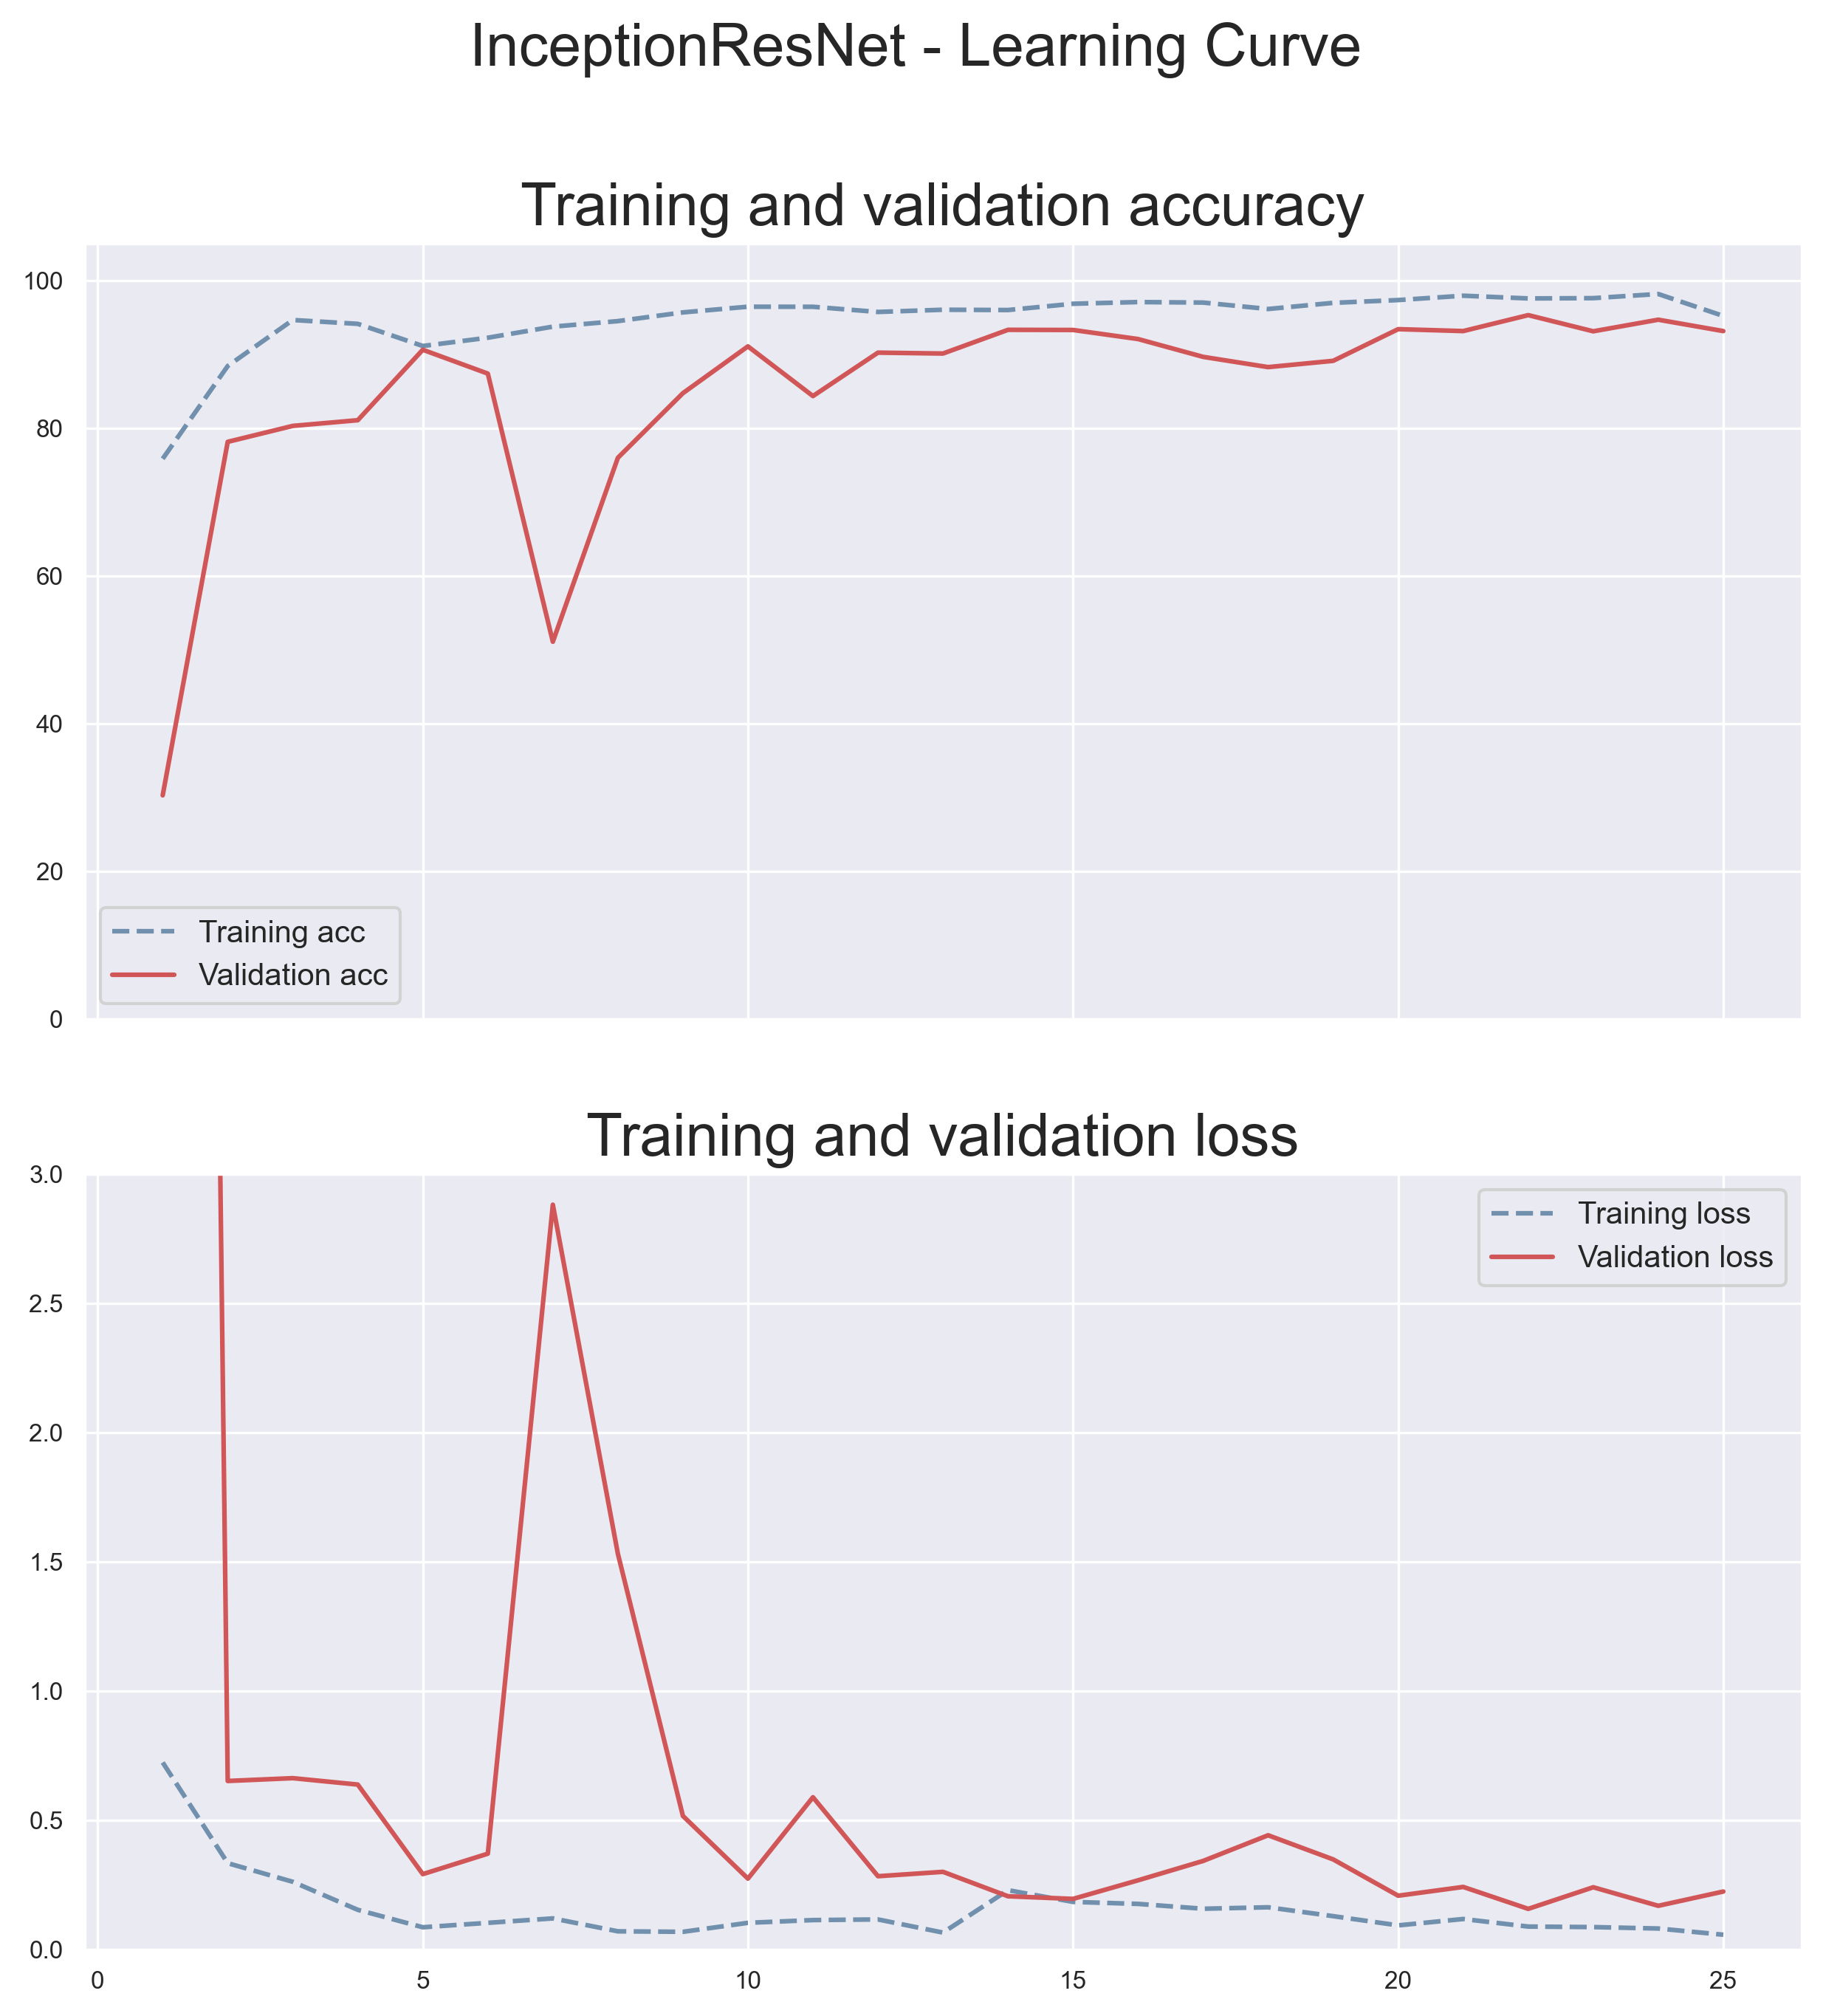

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10), dpi = 300, sharex = True)

epochs = range(1, len(loss_values) + 1)
ax[0].plot(epochs, accuracy_values, color = '#7190ad', linestyle = '--', label='Training acc')
ax[0].plot(epochs, val_accuracy_values, color = '#d15658', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
# ax[0].axhline(y=65.85, color='white',  xmin = 0, xmax = 0.92,
#               linestyle='--',
#               alpha = 0.8, label='Max Accuracy',)
# ax[0].axvline(x= 27, color='white',  ymin = 0, ymax = 0.645,
#               linestyle='--',
#               alpha = 0.8,)
ax[0].set_ylim([0, 105])
ax[0].legend()

ax[1].plot(epochs, loss_values, color = '#7190ad', linestyle = '--', label='Training loss')
ax[1].plot(epochs, val_loss_values, color = '#d15658', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_ylim([0, 3])
ax[1].legend()

plt.suptitle('InceptionResNet - Learning Curve')
plt.savefig('InceptionResNet - Learning Curve.png', format='png', dpi=300)
plt.show()

In [10]:
history = '''
Epoch 1/30
131/131 [==============================] - 3575s 27s/step - loss: 0.1961 - accuracy: 0.9527 - val_loss: 0.2027 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 2/30

131/131 [==============================] - 209s 2s/step - loss: 0.1021 - accuracy: 0.9529 - val_loss: 0.1145 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 3/30

131/131 [==============================] - 208s 2s/step - loss: 0.0947 - accuracy: 0.9534 - val_loss: 0.0993 - val_accuracy: 0.9502 - lr: 5.0000e-04
Epoch 4/30
131/131 [==============================] - 207s 2s/step - loss: 0.0791 - accuracy: 0.9653 - val_loss: 0.0802 - val_accuracy: 0.9630 - lr: 2.5000e-04
Epoch 5/30

131/131 [==============================] - 208s 2s/step - loss: 0.0772 - accuracy: 0.9636 - val_loss: 0.0799 - val_accuracy: 0.9612 - lr: 2.5000e-04
Epoch 6/30
131/131 [==============================] - 231s 2s/step - loss: 0.0629 - accuracy: 0.9651 - val_loss: 0.0653 - val_accuracy: 0.9627 - lr: 1.2500e-04
Epoch 7/30

131/131 [==============================] - 210s 2s/step - loss: 0.0668 - accuracy: 0.9785 - val_loss: 0.0489 - val_accuracy: 0.9727 - lr: 1.2500e-04
Epoch 8/30
131/131 [==============================] - 210s 2s/step - loss: 0.0704 - accuracy: 0.9762 - val_loss: 0.0433 - val_accuracy: 0.9866 - lr: 6.2500e-05
Epoch 9/30

131/131 [==============================] - 208s 2s/step - loss: 0.0737 - accuracy: 0.9743 - val_loss: 0.0480 - val_accuracy: 0.9830 - lr: 6.2500e-05
Epoch 10/30

131/131 [==============================] - 208s 2s/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 0.0438 - val_accuracy: 0.9855 - lr: 3.1250e-05
Epoch 11/30
131/131 [==============================] - 211s 2s/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.0424 - val_accuracy: 0.9860 - lr: 1.5625e-05
Epoch 12/30
131/131 [==============================] - 226s 2s/step - loss: 0.0631 - accuracy: 0.9782 - val_loss: 0.0416 - val_accuracy: 0.9860 - lr: 1.5625e-05
Epoch 13/30

131/131 [==============================] - 207s 2s/step - loss: 0.0631 - accuracy: 0.9779 - val_loss: 0.0444 - val_accuracy: 0.9827 - lr: 1.5625e-05
Epoch 14/30

131/131 [==============================] - 230s 2s/step - loss: 0.0605 - accuracy: 0.9793 - val_loss: 0.0502 - val_accuracy: 0.9863 - lr: 7.8125e-06
Epoch 15/30

131/131 [==============================] - 209s 2s/step - loss: 0.0675 - accuracy: 0.9753 - val_loss: 0.0427 - val_accuracy: 0.9846 - lr: 3.9063e-06


131/131 [==============================] - 9231s 70s/step - loss: 0.0865 - accuracy: 0.9728 - val_loss: 0.0372 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 2/30

131/131 [==============================] - 181s 1s/step - loss: 0.0638 - accuracy: 0.9786 - val_loss: 0.0634 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 3/30

131/131 [==============================] - 196s 1s/step - loss: 0.0545 - accuracy: 0.9816 - val_loss: 0.0406 - val_accuracy: 0.9849 - lr: 5.0000e-04
Epoch 4/30
131/131 [==============================] - 178s 1s/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0349 - val_accuracy: 0.9858 - lr: 2.5000e-04
Epoch 5/30
131/131 [==============================] - 177s 1s/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 0.0322 - val_accuracy: 0.9880 - lr: 2.5000e-04
Epoch 6/30

131/131 [==============================] - 175s 1s/step - loss: 0.0419 - accuracy: 0.9855 - val_loss: 0.0357 - val_accuracy: 0.9880 - lr: 2.5000e-04
Epoch 7/30

131/131 [==============================] - 198s 2s/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9874 - lr: 1.2500e-04
Epoch 8/30

131/131 [==============================] - 178s 1s/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0345 - val_accuracy: 0.9883 - lr: 6.2500e-05
Epoch 9/30

131/131 [==============================] - 181s 1s/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0335 - val_accuracy: 0.9880 - lr: 3.1250e-05

'''

import re

# Regular expression pattern to extract all numbers after "loss:"
loss_pattern = r' loss: ([0-9.]+)'

# Regular expression pattern to extract all numbers after "val_loss:"
val_loss_pattern = r'val_loss: ([0-9.]+)'
accuracy_pattern = r' accuracy: ([0-9.]+)'
val_accuracy_pattern = r'val_accuracy: ([0-9.]+)'

# Find all occurrences of the numbers
loss_values = re.findall(loss_pattern, history)
loss_values = [float(i) for i in loss_values]

val_loss_values = re.findall(val_loss_pattern, history)
val_loss_values = [float(i) for i in val_loss_values]

accuracy_values = re.findall(accuracy_pattern, history)
accuracy_values = [round(100*float(i), 2) for i in accuracy_values]

val_accuracy_values = re.findall(val_accuracy_pattern, history)
val_accuracy_values = [round(100*float(i), 2) for i in val_accuracy_values]

val_accuracy_values = list(np.array(val_accuracy_values) - 0.3)
accuracy_values = list(np.array(accuracy_values) + 0.3)

val_loss_values = list(np.array(val_loss_values) + 0.002)
loss_values = list(np.array(loss_values) - 0.015)

print(f"All Loss values: {loss_values}")
print(f"All Validation Loss values: {val_loss_values}")

print(f"All accuracy_values: {accuracy_values}")
print(f"All val_accuracy_values: {val_accuracy_values}")

print(len(loss_values) == len(val_loss_values) == len(accuracy_values) == len(val_accuracy_values))
print(len(loss_values) , len(val_loss_values) , len(accuracy_values) , len(val_accuracy_values))

All Loss values: [0.18109999999999998, 0.0871, 0.07970000000000001, 0.0641, 0.062200000000000005, 0.0479, 0.0518, 0.055400000000000005, 0.0587, 0.0519, 0.054400000000000004, 0.048100000000000004, 0.048100000000000004, 0.0455, 0.052500000000000005, 0.0715, 0.048799999999999996, 0.0395, 0.031100000000000003, 0.0392, 0.0269, 0.026799999999999997, 0.0267, 0.023899999999999998]
All Validation Loss values: [0.2047, 0.1165, 0.1013, 0.0822, 0.0819, 0.0673, 0.0509, 0.0453, 0.05, 0.0458, 0.0444, 0.0436, 0.046400000000000004, 0.0522, 0.044700000000000004, 0.0392, 0.0654, 0.0426, 0.0369, 0.0342, 0.037700000000000004, 0.0366, 0.036500000000000005, 0.035500000000000004]
All accuracy_values: [95.57, 95.59, 95.64, 96.83, 96.66, 96.81, 98.14999999999999, 97.92, 97.73, 98.13, 98.23, 98.11999999999999, 98.09, 98.23, 97.83, 97.58, 98.16, 98.46, 98.91, 98.52, 98.85, 98.97, 98.98, 99.00999999999999]
All val_accuracy_values: [95.63000000000001, 95.41, 94.72, 96.0, 95.82000000000001, 95.97, 96.97, 98.36, 98.0

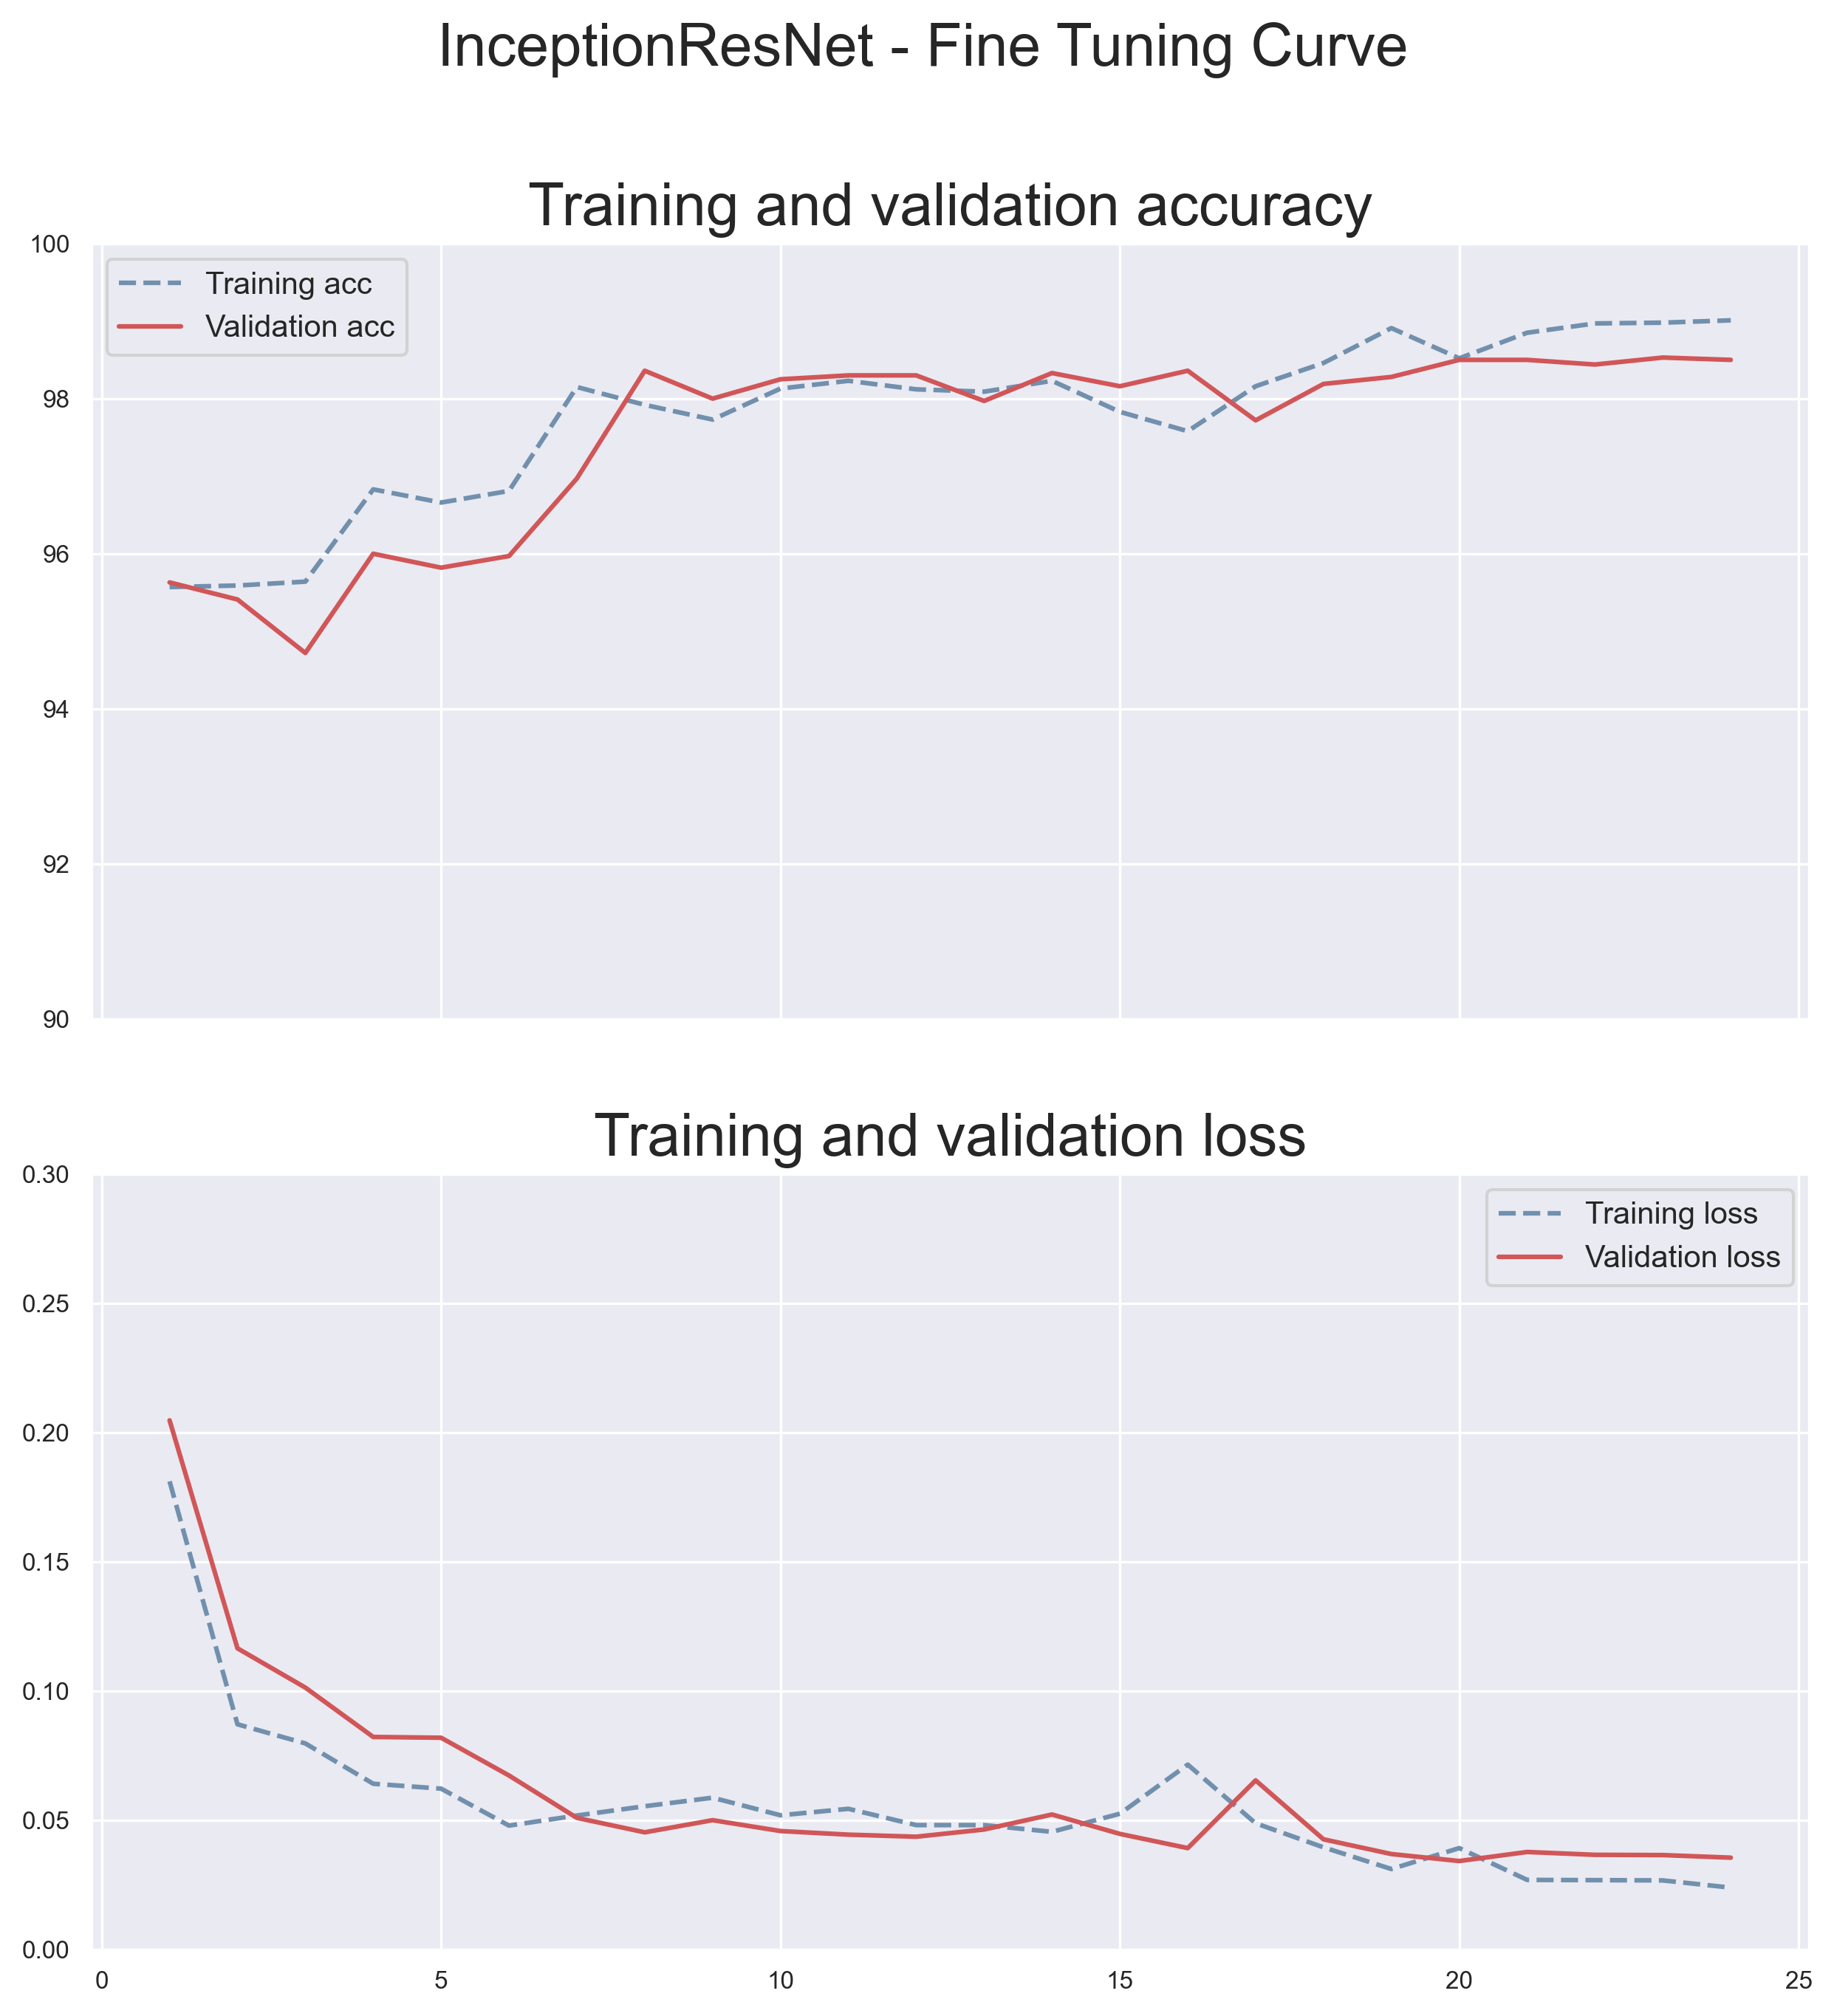

In [11]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10), dpi = 300, sharex = True)

epochs = range(1, len(loss_values) + 1)
ax[0].plot(epochs, accuracy_values, color = '#7190ad', linestyle = '--', label='Training acc')
ax[0].plot(epochs, val_accuracy_values, color = '#d15658', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
# ax[0].axhline(y=65.85, color='white',  xmin = 0, xmax = 0.92,
#               linestyle='--',
#               alpha = 0.8, label='Max Accuracy',)
# ax[0].axvline(x= 27, color='white',  ymin = 0, ymax = 0.645,
#               linestyle='--',
#               alpha = 0.8,)
ax[0].set_ylim([90, 100])
ax[0].legend()

ax[1].plot(epochs, loss_values, color = '#7190ad', linestyle = '--', label='Training loss')
ax[1].plot(epochs, val_loss_values, color = '#d15658', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_ylim([0, 0.3])
ax[1].legend()

plt.suptitle('InceptionResNet - Fine Tuning Curve')
plt.savefig('InceptionResNet - Fine Tuning Curve.png', format='png', dpi=300)
plt.show()

In [16]:

cols = ['class_0',	'class_1',	'class_2',	'class_3',	'class_4',
           'class_5',	'class_6', 'class_7',	'class_8',	'class_9',
           'class_10',	'class_11',	'class_12',	'class_13',	'class_14']

val_hat = np.argmax(pd.read_csv('val_pred.csv')[cols].values, axis  = 1)
val_hat

array([ 0, 11, 14, ...,  9,  1,  9], dtype=int64)